In [ ]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=c1635e0c1537a9d06735296e55bc63f411d063e2c37ed41c13a64b002d075951
  Stored in directory: /root/.cache/pip/wheels/21/2d/19/8b5488f0caea6d892333413745640532d40d70e6b5351d7633
Successfully built pyforest


In [ ]:
# Importing pyforest:
import pyforest

In [ ]:
Content
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

**Content
         Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance** 

In [ ]:
# importing dataset
df= pd.read_csv('/content/drive/MyDrive/health-insurance-premium-prediction/insurance.csv')

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# print last 5 rows of the dataset:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
# Checking for the null values:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

In [ ]:
def num_plot(x,c='g'):
  plt.figure(figsize = (16,8))
  sns.distplot(df[x],color = c)
  plt.show()
  print(10*'----',x,10*'----')
  print('MIN: ',df[x].min())
  print('MAX: ',df[x].max())
  print('MEAN: ',df[x].mean())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

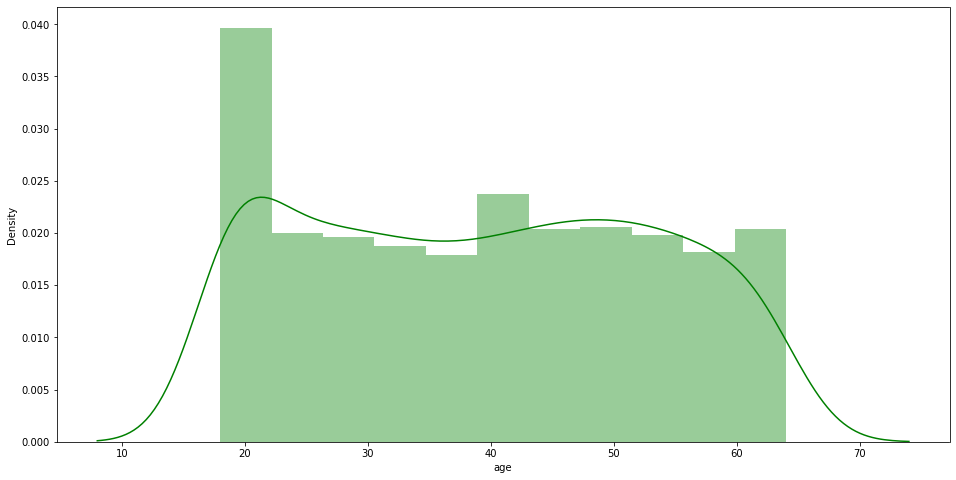

---------------------------------------- age ----------------------------------------
MIN:  18
MAX:  64
MEAN:  39.20702541106129


In [ ]:
num_plot('age')

**FROM THE ABOVE 
the minimum age of the primary beneficiary = 18
the maximum age of the primary beneficiary = 64*
the maximum members age between 15 to 24*

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

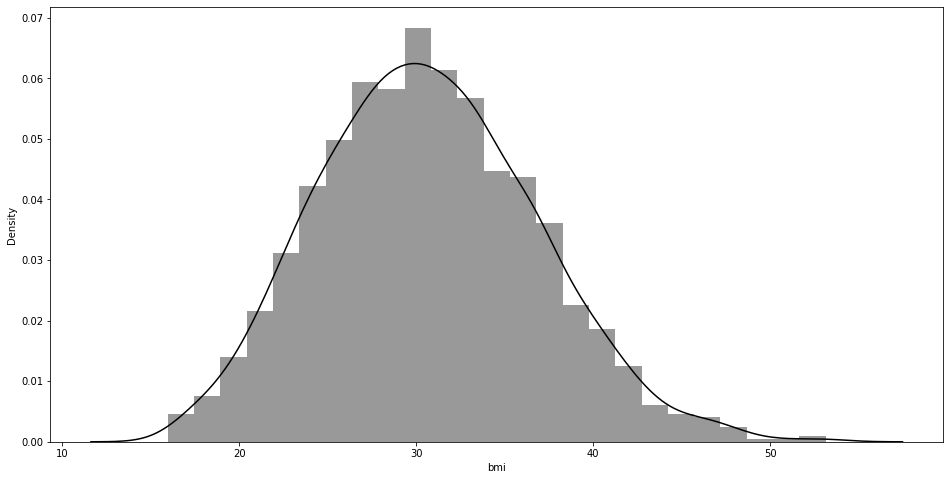

---------------------------------------- bmi ----------------------------------------
MIN:  15.96
MAX:  53.13
MEAN:  30.66339686098655


In [ ]:
num_plot('bmi','black')

*maximum members bmi is near to 30 which is not a ideal*

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

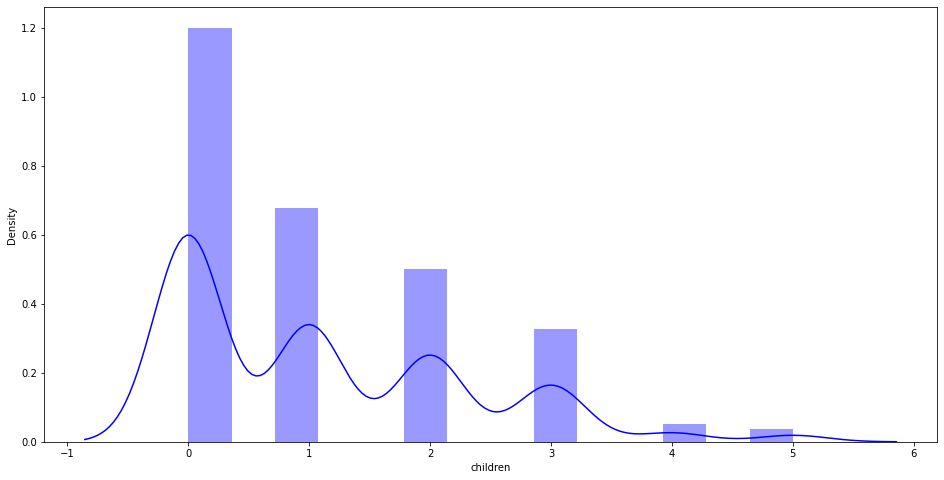

---------------------------------------- children ----------------------------------------
MIN:  0
MAX:  5
MEAN:  1.0949177877429


In [ ]:
num_plot('children','blue')

Most of peoples are single because maximum account holders are near to 24 age group.The maximum Number of children covered by health insurance is 5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

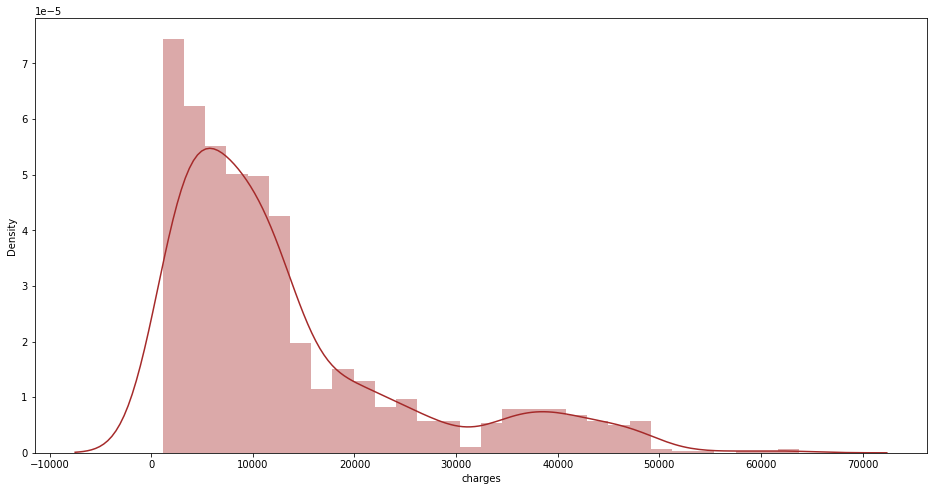

---------------------------------------- charges ----------------------------------------
MIN:  1121.8739
MAX:  63770.42801
MEAN:  13270.422265141257


In [ ]:
num_plot('charges','brown')

The max Individual medical costs billed by health insurance is 63770.42801(dollars)
      The min Individual medical costs billed by health insurance is 1121.8739 (dollars)

In [ ]:
 def cat_plot(x):
  plt.figure(figsize = (16,8))
  sns.countplot(df[x])
  plt.show()
  print(df[x].value_counts(normalize = True))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

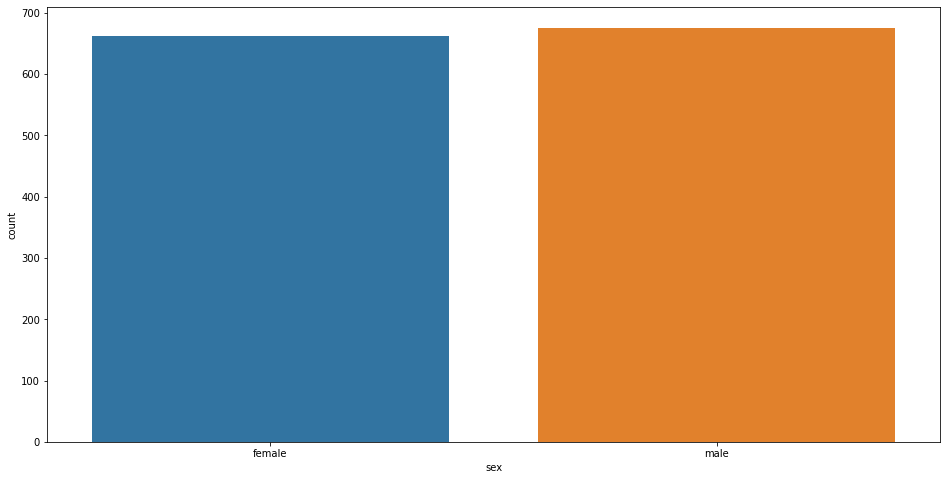

male      0.505232
female    0.494768
Name: sex, dtype: float64


In [ ]:
cat_plot('sex')

Almost male and female are same 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

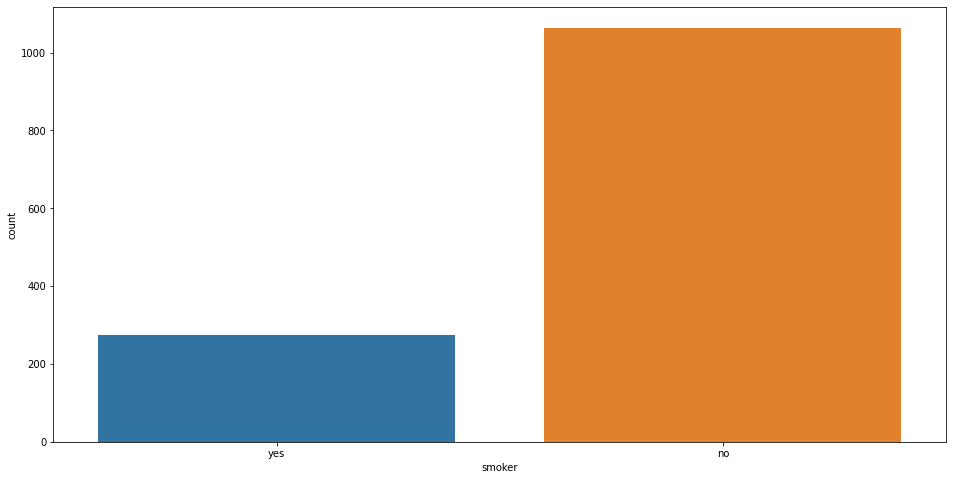

no     0.795217
yes    0.204783
Name: smoker, dtype: float64


In [ ]:
cat_plot('smoker')

**80% are non_smokers and 
20% are smokers**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

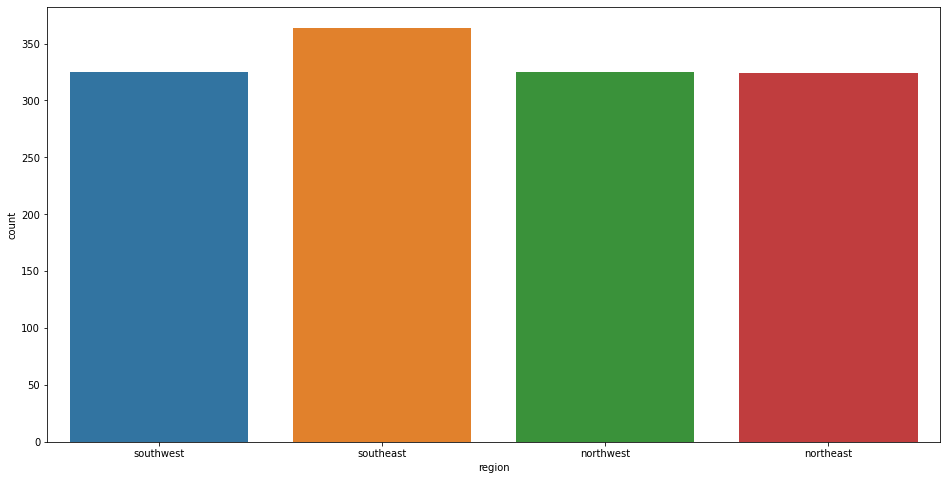

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64


In [ ]:
cat_plot('region')

the most of  beneficiary's residential area in the US, southeast,
remaining are from northeast,southwest,northwest with equal percentages.

**Ideal BMI(18 - 25)**

In [ ]:
ideal_bmi = df[(df['bmi']>=18) & (df['bmi']<=25)]
ideal_bmi

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
15,19,male,24.600,1,no,southwest,1837.23700
17,23,male,23.845,0,no,northeast,2395.17155
26,63,female,23.085,0,no,northeast,14451.83515
35,19,male,20.425,0,no,northwest,1625.43375
...,...,...,...,...,...,...,...
1304,42,male,24.605,2,yes,northeast,21259.37795
1306,29,female,21.850,0,yes,northeast,16115.30450
1314,30,female,23.655,3,yes,northwest,18765.87545
1316,19,female,20.600,0,no,southwest,1731.67700


**AGE vs CHARGES*

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

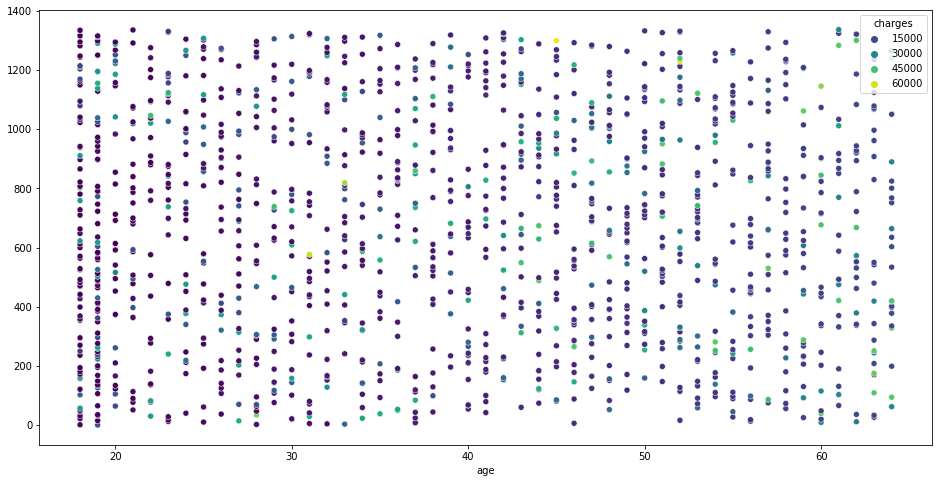

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(y = np.arange(len(df)), x=df['age'],hue=df['charges'],palette = 'viridis', size_order = 'big')
plt.show()

****

AGE vs BMI vs CHARGES

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

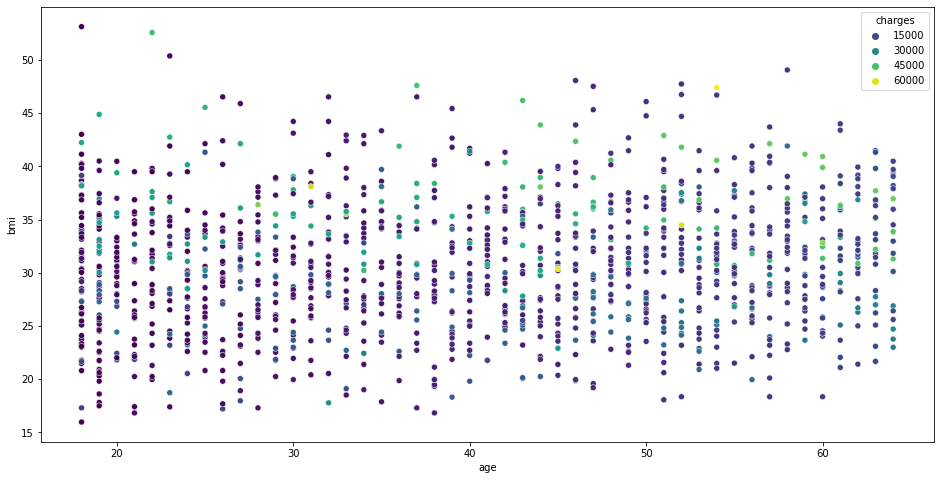

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot( y = df['bmi'],x=df['age'],hue=df['charges'],palette = 'viridis', size_order = 'big')
plt.show()

** Customers who are paying  more than 50k as CHARGES  and their BMI **

<IPython.core.display.Javascript object>

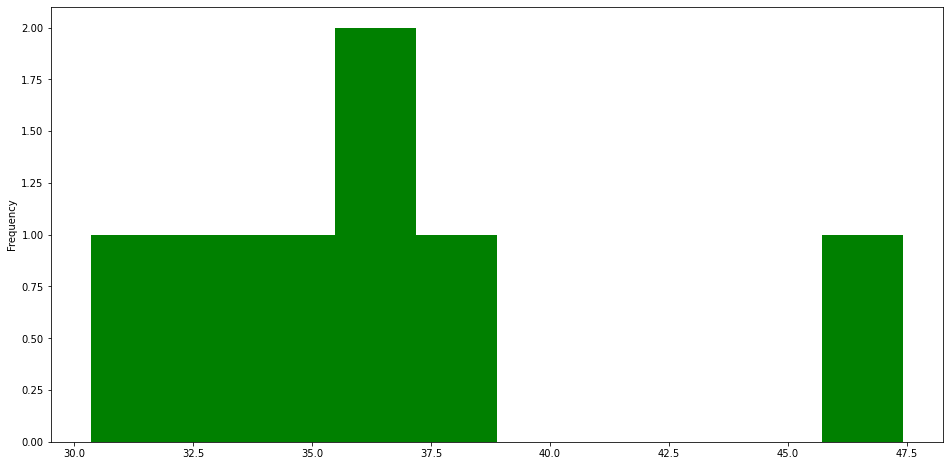

In [ ]:
plt.figure(figsize = (16,8))
df[df['charges']> 50000]['bmi'].plot(kind = 'hist',color = 'g')

** Customers who are paying more than 50k as CHARGES and their AGE **

<IPython.core.display.Javascript object>

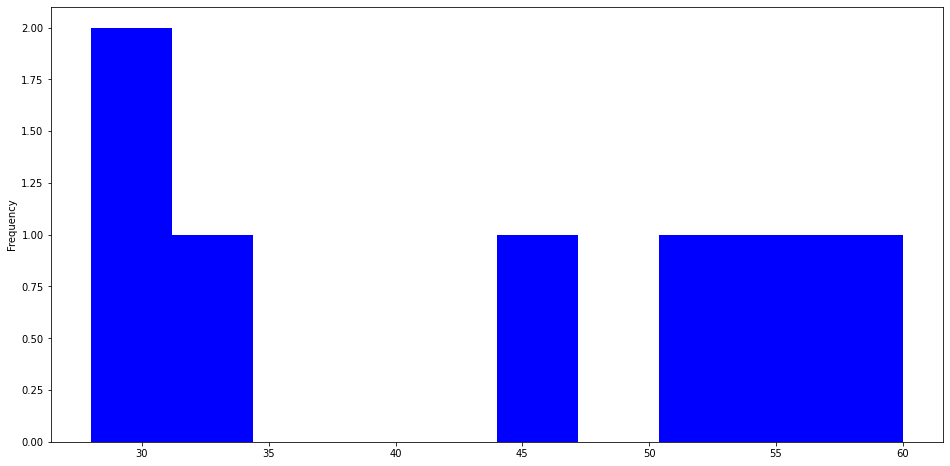

In [ ]:
plt.figure(figsize = (16,8))
df[df['charges']> 50000]['age'].plot(kind = 'hist',color = 'b')

# **Converting to Numerical**

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder


In [ ]:
gender = pd.get_dummies(df['sex'],drop_first = True,prefix = 'gender')
gender.head(2)

<IPython.core.display.Javascript object>

,gender_male
0,0
1,1


In [ ]:
df = pd.concat([df,gender],axis=1)
df.head()

<IPython.core.display.Javascript object>

,age,sex,bmi,children,smoker,region,charges,gender_male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [ ]:
lb_smkr = LabelEncoder()
smoker = lb_smkr.fit_transform(df['smoker'])

In [ ]:
df['smoker'] = smoker

In [ ]:
lb_smkr.classes_

array(['no', 'yes'], dtype=object)

In [ ]:
lb_region = LabelEncoder()
region = lb_region.fit_transform(df['region'])

In [ ]:
df['region'] = region

In [ ]:
lb_region.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,gender_male
0,19,female,27.900,0,1,3,16884.92400,0
1,18,male,33.770,1,0,2,1725.55230,1
2,28,male,33.000,3,0,2,4449.46200,1
3,33,male,22.705,0,0,1,21984.47061,1
4,32,male,28.880,0,0,1,3866.85520,1


In [ ]:
# Droping 'sex' column:
df.drop('sex', axis = 1, inplace = True)

In [ ]:
df.head()

,age,bmi,children,smoker,region,charges,gender_male
0,19,27.900,0,1,3,16884.92400,0
1,18,33.770,1,0,2,1725.55230,1
2,28,33.000,3,0,2,4449.46200,1
3,33,22.705,0,0,1,21984.47061,1
4,32,28.880,0,0,1,3866.85520,1


In [ ]:
x = df.drop('charges', axis = 1).values
y  = df['charges'].values

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,train_test_split

In [ ]:
std = StandardScaler()
x = std.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 89)

In [ ]:
x_train.shape

(1070, 6)

In [ ]:
y_train.shape

(1070,)

In [ ]:
x_test.shape

(268, 6)

In [ ]:
y_test.shape

(268,)

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [ ]:
# Mean Squared Error:
mse =  mean_squared_error(y_test,y_pred)

mse

38497798.37035018

In [ ]:
# Error rate in prediction:
np.sqrt(mse)

<IPython.core.display.Javascript object>

6204.659408086006

In [ ]:
# R2 Score:
r2_score(y_test,y_pred)

0.7824541911545069

In [ ]:
df.head()

,age,bmi,children,smoker,region,charges,gender_male
0,19,27.900,0,1,3,16884.92400,0
1,18,33.770,1,0,2,1725.55230,1
2,28,33.000,3,0,2,4449.46200,1
3,33,22.705,0,0,1,21984.47061,1
4,32,28.880,0,0,1,3866.85520,1


In [ ]:
pt = [[32,28.88,0,0,1,1]]
pt = std.transform(pt)

In [ ]:
lr.predict(pt)

array([5564.18515006])